# 4-2 six classes - test model

In [1]:
%load_ext autoreload
%autoreload 2

from import_file import*


In [2]:
path = Path.cwd() / "processed_data" / "df_raw.pkl"
df = pd.read_pickle(path)

In [3]:
# Specifiying features and labels
X = df['statement']
y = df['label']

In [4]:
# Specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


## Defining Functions

In [5]:
stemmer = PorterStemmer()

def tokenizer(input_string):
    words = re.sub(r"[^A-Za-z0-9-]", " ", input_string) # Replace everything except a-zA-Z0-9- by a space
    words = words.lower() # Lower casing
    words = words.split() # Split a string into a list  
    words = [stemmer.stem(word) for word in words] #Stemming
    return words

In [6]:
# Stopwords list set to english
stopwords_list = stopwords.words('english')

In [7]:
model_dict = {}
model_accuracy = []

In [8]:
def print_results():
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    model_accuracy.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [9]:
def display_confusion_matrix(cm, classes, title='Confusion Matrix'):
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    size = (10, 8)
    fig, ax = plt.subplots(figsize = size)
    sns.heatmap(df_cm, annot=True, cmap="Blues", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    plt.title(title)

## Logistic Regression

### Using `pipe1`

In [10]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_LR.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[0]='pipe 1 Logistic Regression'
print_results() 

Accuracy:  0.24065420560747663
              precision    recall  f1-score   support

 barely-true       0.23      0.15      0.18       422
       false       0.26      0.32      0.29       502
   half-true       0.24      0.32      0.27       528
 mostly-true       0.22      0.25      0.23       493
  pants-fire       0.34      0.05      0.08       210
        true       0.26      0.23      0.24       413

    accuracy                           0.24      2568
   macro avg       0.26      0.22      0.22      2568
weighted avg       0.25      0.24      0.23      2568

[[ 65  96 124  91   8  38]
 [ 59 161 130  82   3  67]
 [ 59 123 168 123   4  51]
 [ 49  96 140 121   3  84]
 [ 34  69  38  35  10  24]
 [ 22  82 110 105   1  93]]


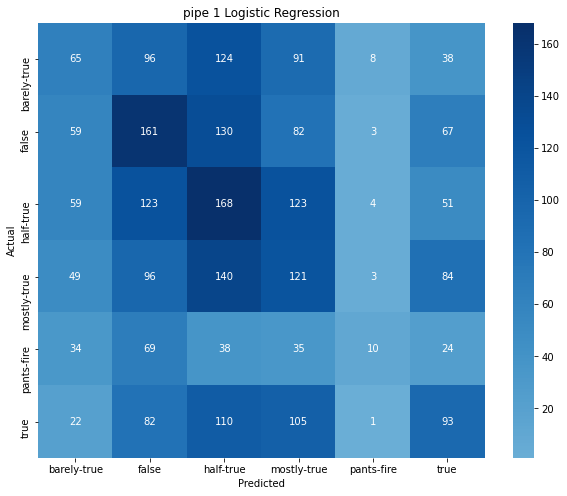

In [11]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Logistic Regression')

### Using `pipe2`

In [12]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_LR.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[1]='pipe 2 Logistic Regression'
print_results() 

Accuracy:  0.23169781931464176
              precision    recall  f1-score   support

 barely-true       0.21      0.17      0.19       422
       false       0.25      0.28      0.27       502
   half-true       0.23      0.27      0.25       528
 mostly-true       0.20      0.21      0.21       493
  pants-fire       0.21      0.11      0.15       210
        true       0.26      0.26      0.26       413

    accuracy                           0.23      2568
   macro avg       0.23      0.22      0.22      2568
weighted avg       0.23      0.23      0.23      2568

[[ 73  87 107  80  25  50]
 [ 70 143 109  93  18  69]
 [ 65 110 143 110  30  70]
 [ 70  97 120 104  14  88]
 [ 36  48  37  37  24  28]
 [ 32  78  94  95   6 108]]


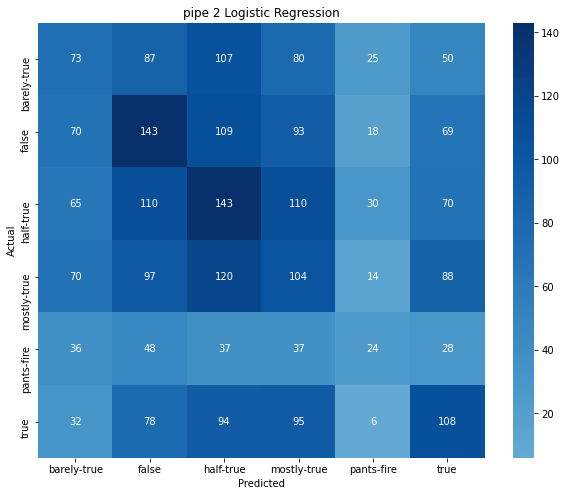

In [13]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Logistic Regression')

## Multinomial Naive Bayes

### Using `pipe1`

In [14]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_MNB.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[2]='pipe 1 Multinomial Naive Bayes'
print_results() 

Accuracy:  0.23169781931464176
              precision    recall  f1-score   support

 barely-true       0.25      0.08      0.12       422
       false       0.24      0.27      0.26       502
   half-true       0.23      0.51      0.31       528
 mostly-true       0.23      0.28      0.25       493
  pants-fire       0.00      0.00      0.00       210
        true       0.24      0.05      0.08       413

    accuracy                           0.23      2568
   macro avg       0.20      0.20      0.17      2568
weighted avg       0.22      0.23      0.20      2568

[[ 33  92 203  84   0  10]
 [ 30 135 217 104   0  16]
 [ 24  98 267 130   0   9]
 [ 21  78 237 140   0  17]
 [ 16  72  77  35   0  10]
 [ 10  80 177 126   0  20]]


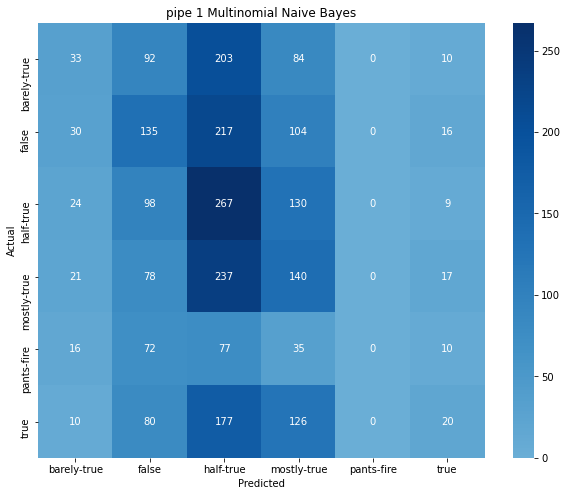

In [15]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Multinomial Naive Bayes')

### Using `pipe2`

In [16]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_MNB.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[3]='pipe 2 Multinomial Naive Bayes'
print_results() 

Accuracy:  0.24143302180685358
              precision    recall  f1-score   support

 barely-true       0.23      0.18      0.20       422
       false       0.24      0.23      0.23       502
   half-true       0.25      0.38      0.30       528
 mostly-true       0.24      0.30      0.27       493
  pants-fire       0.19      0.04      0.07       210
        true       0.26      0.17      0.21       413

    accuracy                           0.24      2568
   macro avg       0.23      0.22      0.21      2568
weighted avg       0.24      0.24      0.23      2568

[[ 76  80 137  85   8  36]
 [ 77 117 145 102  11  50]
 [ 60  98 198 127   7  38]
 [ 54  67 160 148   9  55]
 [ 37  63  44  30   9  27]
 [ 31  69 121 117   3  72]]


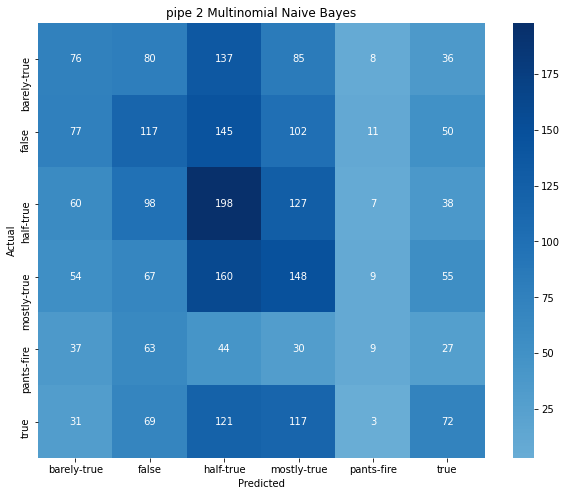

In [17]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Multinomial Naive Bayes')

## Support Vector Machine

### Using `pipe1`

In [18]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_SVM.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[4]='pipe 1 Support Vector Machine'
print_results() 

Accuracy:  0.23481308411214954
              precision    recall  f1-score   support

 barely-true       0.24      0.20      0.21       422
       false       0.24      0.29      0.26       502
   half-true       0.24      0.31      0.27       528
 mostly-true       0.21      0.24      0.22       493
  pants-fire       0.23      0.04      0.07       210
        true       0.25      0.21      0.23       413

    accuracy                           0.23      2568
   macro avg       0.23      0.21      0.21      2568
weighted avg       0.23      0.23      0.23      2568

[[ 83  96 118  79   8  38]
 [ 76 144 122  92   7  61]
 [ 73 114 166 117   6  52]
 [ 55  96 139 116   4  83]
 [ 33  66  44  36   8  23]
 [ 31  89 105 100   2  86]]


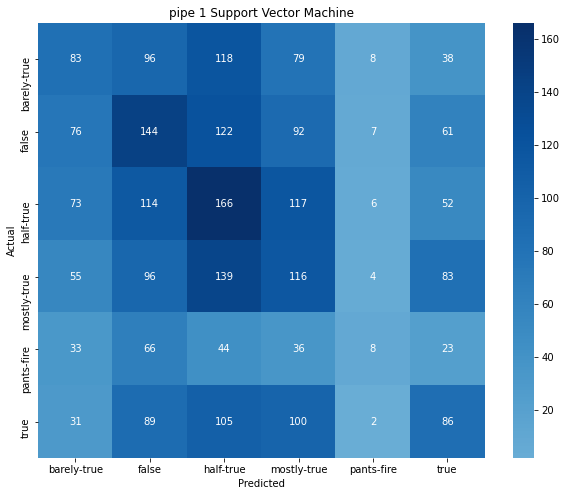

In [19]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Support Vector Machine')

### Using `pipe2`

In [20]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_SVM.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[5]='pipe 2 Support Vector Machine'
print_results() 

Accuracy:  0.22390965732087229
              precision    recall  f1-score   support

 barely-true       0.20      0.22      0.21       422
       false       0.23      0.27      0.25       502
   half-true       0.24      0.25      0.24       528
 mostly-true       0.21      0.19      0.20       493
  pants-fire       0.20      0.16      0.18       210
        true       0.26      0.21      0.23       413

    accuracy                           0.22      2568
   macro avg       0.22      0.22      0.22      2568
weighted avg       0.22      0.22      0.22      2568

[[ 93  89 105  60  30  45]
 [100 134 104  82  26  56]
 [ 89 115 133 106  35  50]
 [ 84 112 100  95  24  78]
 [ 46  54  28  28  33  21]
 [ 55  85  91  82  13  87]]


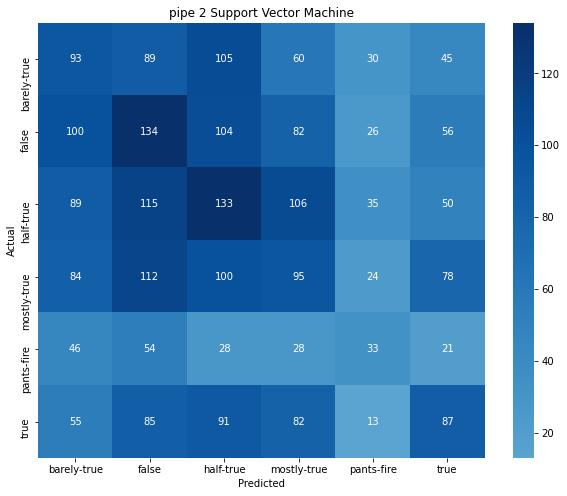

In [21]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Support Vector Machine')

## Decision Tree Classifier

### Using `pipe1`

In [22]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_DTC.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[6]='pipe 1 Decision Tree Classifier'
print_results() 

Accuracy:  0.2059968847352025
              precision    recall  f1-score   support

 barely-true       0.16      0.14      0.15       422
       false       0.23      0.24      0.23       502
   half-true       0.23      0.24      0.23       528
 mostly-true       0.21      0.22      0.22       493
  pants-fire       0.16      0.13      0.15       210
        true       0.20      0.22      0.21       413

    accuracy                           0.21      2568
   macro avg       0.20      0.20      0.20      2568
weighted avg       0.20      0.21      0.20      2568

[[ 57  87  97  88  37  56]
 [ 82 118 107  81  37  77]
 [ 79 100 128 104  25  92]
 [ 67  80 111 108  25 102]
 [ 31  55  34  34  28  28]
 [ 47  78  88  89  21  90]]


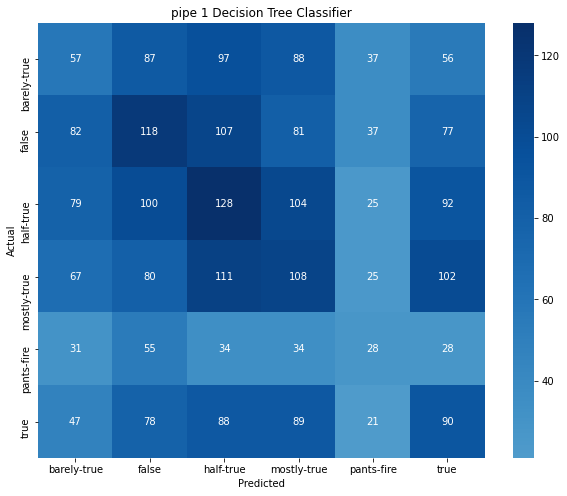

In [23]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Decision Tree Classifier')

### Using `pipe2`

In [24]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_DTC.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[7]='pipe 2 Decision Tree Classifier'
print_results() 

Accuracy:  0.22585669781931464
              precision    recall  f1-score   support

 barely-true       0.20      0.19      0.19       422
       false       0.23      0.25      0.24       502
   half-true       0.23      0.24      0.23       528
 mostly-true       0.22      0.23      0.23       493
  pants-fire       0.21      0.14      0.17       210
        true       0.25      0.25      0.25       413

    accuracy                           0.23      2568
   macro avg       0.22      0.22      0.22      2568
weighted avg       0.23      0.23      0.22      2568

[[ 80  84 105  83  25  45]
 [ 89 126  95  80  34  78]
 [ 83  96 129 115  25  80]
 [ 73  92 122 113  13  80]
 [ 30  51  42  29  30  28]
 [ 44  90  77  84  16 102]]


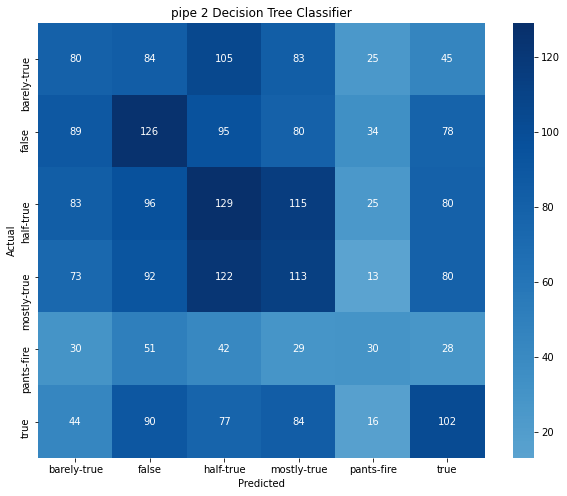

In [25]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Decision Tree Classifier')

## Random Forest Classifier

### Using `pipe1`

In [26]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe1_RFC.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[8]='pipe 1 Random Forest Classifier'
print_results() 

Accuracy:  0.25038940809968846
              precision    recall  f1-score   support

 barely-true       0.25      0.17      0.20       422
       false       0.27      0.45      0.34       502
   half-true       0.25      0.27      0.26       528
 mostly-true       0.21      0.23      0.22       493
  pants-fire       0.28      0.07      0.11       210
        true       0.27      0.18      0.22       413

    accuracy                           0.25      2568
   macro avg       0.26      0.23      0.22      2568
weighted avg       0.25      0.25      0.24      2568

[[ 72 122 109  81   9  29]
 [ 53 225  85  89  10  40]
 [ 53 156 144 125  10  40]
 [ 45 119 138 114   5  72]
 [ 33  85  33  29  14  16]
 [ 28 127  74 108   2  74]]


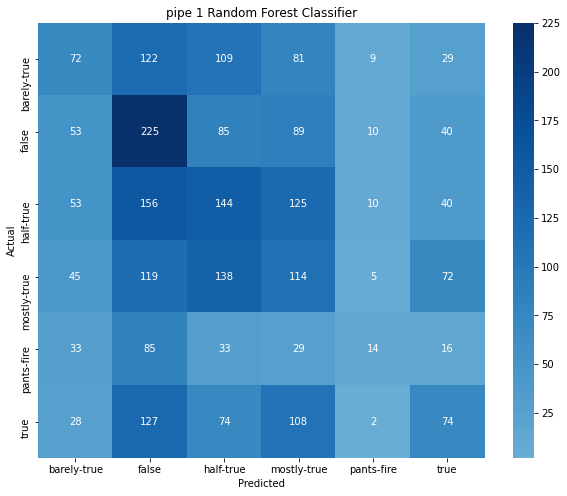

In [27]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 1 Random Forest Classifier')

### Using `pipe2`

In [28]:
# Make predictions using testing set
path = Path.cwd() / "saved_model" / "pipe2_RFC.pkl"
with open(path, 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
model_dict[9]='pipe 2 Random Forest Classifier'
print_results() 

Accuracy:  0.26401869158878505
              precision    recall  f1-score   support

 barely-true       0.27      0.16      0.21       422
       false       0.27      0.46      0.34       502
   half-true       0.26      0.26      0.26       528
 mostly-true       0.26      0.30      0.28       493
  pants-fire       0.35      0.09      0.14       210
        true       0.26      0.17      0.20       413

    accuracy                           0.26      2568
   macro avg       0.28      0.24      0.24      2568
weighted avg       0.27      0.26      0.25      2568

[[ 69 143  98  75   5  32]
 [ 48 232  85  87   9  41]
 [ 55 138 139 131  15  50]
 [ 36 139  98 149   3  68]
 [ 25  81  35  37  19  13]
 [ 18 127  90 105   3  70]]


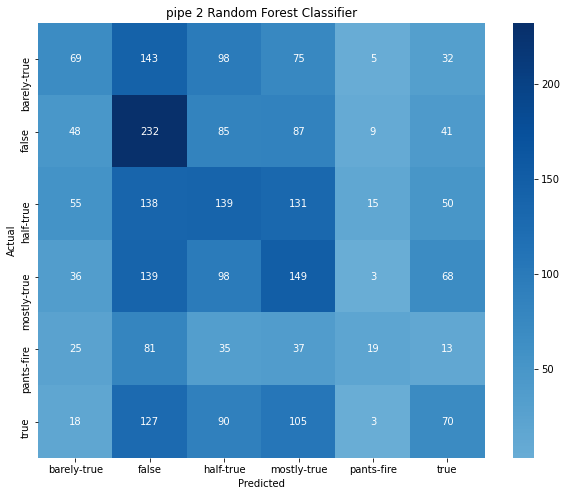

In [29]:
display_confusion_matrix(confusion_matrix(y_test, y_pred), loaded_model.classes_, 'pipe 2 Random Forest Classifier')

## Accuracy of the models

In [30]:
for i in range(len(model_accuracy)):
    print("{} accuracy: {}".format(model_dict[i], model_accuracy[i]))

pipe 1 Logistic Regression accuracy: 0.24065420560747663
pipe 2 Logistic Regression accuracy: 0.23169781931464176
pipe 1 Multinomial Naive Bayes accuracy: 0.23169781931464176
pipe 2 Multinomial Naive Bayes accuracy: 0.24143302180685358
pipe 1 Support Vector Machine accuracy: 0.23481308411214954
pipe 2 Support Vector Machine accuracy: 0.22390965732087229
pipe 1 Decision Tree Classifier accuracy: 0.2059968847352025
pipe 2 Decision Tree Classifier accuracy: 0.22585669781931464
pipe 1 Random Forest Classifier accuracy: 0.25038940809968846
pipe 2 Random Forest Classifier accuracy: 0.26401869158878505
